# Time Series Analysis
Time series is a regression but for time. It is a sequence of data points collected at constant time intervals. Time series forecasting is the use of a model to predict future values based on previously observed values. Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post. We will see how to implement time series analysis in Python.

## Overview
Time series analysis is a statistical technique that deals with time series data, or trend analysis. Time series data means that data is in a series of particular time periods or intervals. The data is considered in a time order. Time series data is data collected over time for a single or a group of variables. Time series data helps us understand the underlying structure and function that produced the data. Time series data can be analyzed in order to extract meaningful statistics and other characteristics.

## Components of Time Series Data
- A time series is a sequence of observations taken sequentially in time. Time series data can be decomposed into the following components:
- - Trend: The long-term movement in the data.
- - Seasonality: The seasonal variation in the data.
- - Noise: The random variation in the data.

## Time Series Analysis Techniques
- Time series analysis can be performed in two domains: time domain and frequency domain.
- - Time Domain: Time domain analysis involves analyzing the data in the time domain. This includes analyzing the data for trends, seasonality, and noise.
- - Frequency Domain: Frequency domain analysis involves analyzing the data in the frequency domain. This includes analyzing the data for periodicity and frequency components.



## Stationary
- constant 
- mean
- variance
Stationary means that the statistical properties of a time series do not change over time. In other words, the mean, variance, and autocorrelation of the time series are constant over time. A time series that is not stationary is called non-stationary. Stationarity is an important concept in time series analysis because many time series analysis techniques assume that the time series is stationary. If the time series is not stationary, the results of the analysis may not be valid.

- Potting Rolling Statistics
We can plot the moving average or moving variance and see if it varies with time. By moving average/variance, I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
- Dickey-Fuller Test
This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.


## ARIMA
- ARIMA stands for AutoRegressive Integrated Moving Average. It is a class of models that captures a suite of different standard temporal structures in time series data.
- The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation.
- The predictors depend on the parameters (p,d,q) of the ARIMA model:
- - Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- - Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
- - Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

* AR: Auto Regressive (p): The AR part is correlation between the current observation and a lagged observation.
* I: Integrated (d): The I part is the number of differences needed to make the time series stationary.
* MA: Moving Average (q): The MA part is correlation between the current observation and a residual error from a moving average model.

## Importing Libraries

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


## Loading Data

In [4]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


EDA - Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [7]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

## Data Visualization

<Axes: >

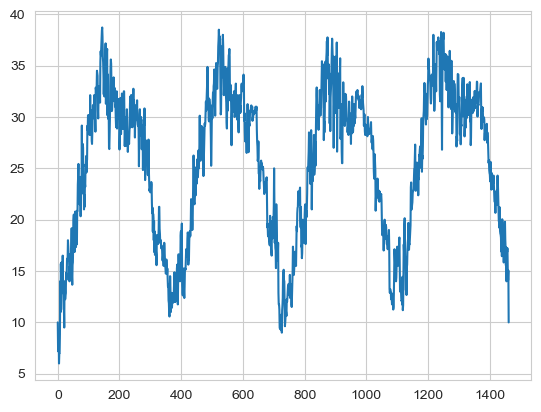

In [9]:
df.meantemp.plot()

### Plotting Rolling Statistics

In [10]:
figure = px.line(df, x='date', y='meantemp', title='Mean Temperature Over Time in Delhi')
figure.show()

In [11]:
figure = px.line(df, x='date', y='humidity', title='Mean Humidity Over Time in Delhi')
figure.show()

In [13]:
figure = px.line(df, x='date', y='wind_speed', title='Mean Windspeed Over Time in Delhi')
figure.show()

In [16]:
px.scatter(df, x='humidity', y='meantemp',size='meantemp', trendline='ols', title='Mean Temperature vs Humidity')

In [17]:
## Data Preprocessing

In [19]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
# df.set_index('date', inplace=True)

In [20]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day

<Axes: xlabel='month', ylabel='meantemp'>

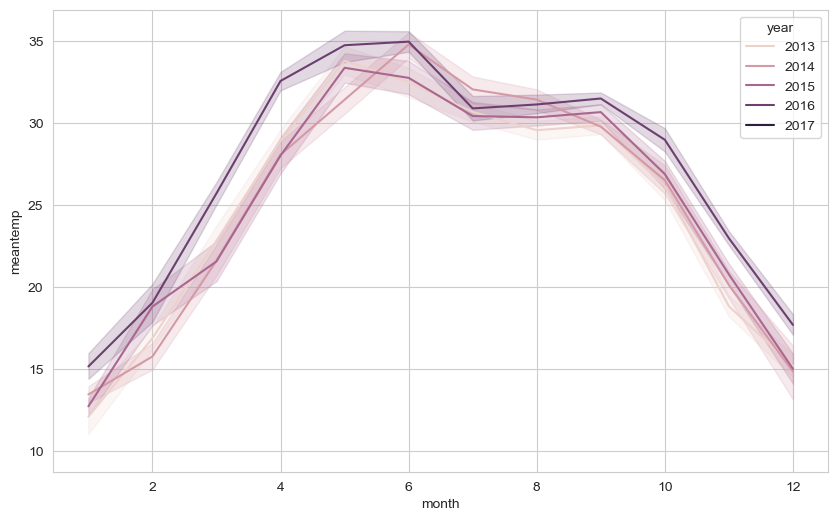

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='meantemp', data=df, hue='year')

In [ ]:
new_df = df[['date', 'meantemp']]


## .. TBD

In [23]:
# pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 9.9 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.9 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [25]:
## reneame columns
forecast_data = df.rename(columns={'date': 'ds', 'meantemp': 'y'})


In [27]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)

plot_plotly(model, predictions)

12:48:53 - cmdstanpy - INFO - Chain [1] start processing
12:48:53 - cmdstanpy - INFO - Chain [1] done processing
